# Intelligent Systems
## HW5
### Reza Jahani / 810198377

# Question 1) Statistical Problems Implementation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import shuffle
import math

## Section 1

### Part 1

In [ ]:
n = 100

In [ ]:
candidates = np.arange(0,n)
candidates_turn = candidates
K = range(5,101,5)
num_experiment = 1000
success_prob = []

In [ ]:
for k in K:
    p = []
    for i in range(num_experiment):
        shuffle(candidates_turn)
        feature_candidates = candidates_turn[:k]
        remaining_candidates = candidates_turn[k:]
        feature = max(feature_candidates)
        if len(np.where(remaining_candidates>feature)[0]) != 0:
            best_candidate = remaining_candidates[np.where(remaining_candidates>feature)[0]][0]
            if best_candidate == n-1:
                p.append(1)
            else:
                p.append(0)
        else:
                p.append(0)
    success_prob.append(sum(p)/num_experiment)

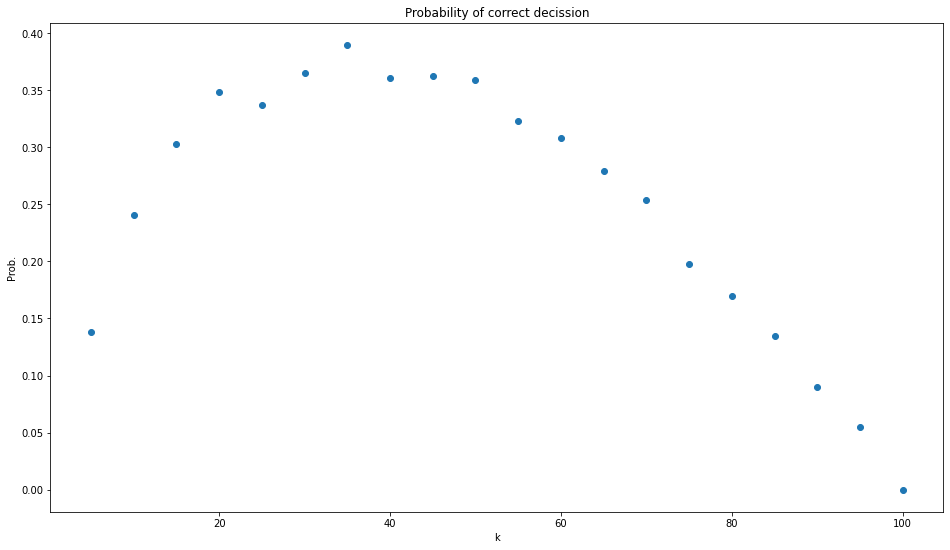

In [ ]:
plt.figure(figsize=(16,9))
plt.scatter(K,success_prob)
plt.title('Probability of correct decission')
plt.xlabel('k')
plt.ylabel('Prob.')
plt.show()

In [ ]:
best_k = K[np.argmax(success_prob)]
print(f"Best K = {best_k}")

Best K = 35


### Part 2

In [ ]:
success_prob = []
num_experiment = 1000
N = range(3,101)
for n in N:
    k = int(n/math.e)
    candidates = np.arange(0,n)
    candidates_turn = candidates
    p = []
    for i in range(num_experiment):
        shuffle(candidates_turn)
        feature_candidates = candidates_turn[:k]
        remaining_candidates = candidates_turn[k:]
        feature = max(feature_candidates)
        if len(np.where(remaining_candidates>feature)[0]) != 0:
            best_candidate = remaining_candidates[np.where(remaining_candidates>feature)[0]][0]
            if best_candidate == n-1:
                p.append(1)
            else:
                p.append(0)
        else:
                p.append(0)
    success_prob.append(sum(p)/num_experiment)

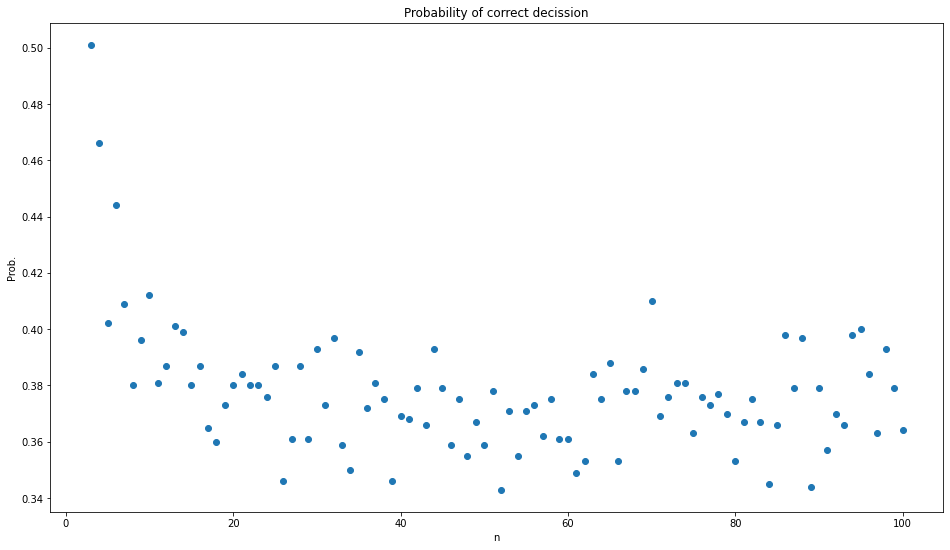

In [ ]:
plt.figure(figsize=(16,9))
plt.scatter(N,success_prob)
plt.title('Probability of correct decission')
plt.xlabel('n')
plt.ylabel('Prob.')
plt.show()

## Section 2

In [ ]:
def Distribution(stdNum):
    np.random.seed(1)
    popSize = 1000 

    a1 = stdNum - int(stdNum / 10) * 10
    a2 = int((stdNum - int(stdNum / 100) * 100)/10)
    a3 = int(stdNum / 100)

    
    mu1, sigma1 = a1/2, np.abs(0.5 + 3*a2/10)
    mu2, sigma2 = -1 * a2/2, np.abs(1 + 3*a3/10)
    mu3, sigma3 = a3/2, np.abs(2 + 3*a1/10)


    distributions = [
    {"type": np.random.normal, "kwargs": {"loc": mu1, "scale": sigma1}},
    {"type": np.random.normal, "kwargs": {"loc": mu2, "scale": sigma2}},
    {"type": np.random.normal, "kwargs": {"loc": mu3, "scale": sigma3}},
    ]
    coefficients = np.array([0.4, 0.25, 0.35])
    coefficients /= coefficients.sum()
    popSize = 100000


    num_distr = len(distributions)
    data = np.zeros((popSize, num_distr))
    for idx, distr in enumerate(distributions):
        data[:, idx] = distr["type"](size=(popSize,), **distr["kwargs"])
    random_idx = np.random.choice(np.arange(num_distr), size=(popSize,), p=coefficients)
    Population = data[np.arange(popSize), random_idx]

    return Population

In [ ]:
def index_generator(n,M):
    index = []
    while len(index)<=n:
        temp = np.random.randint(0,M)
        if temp in index:
            continue
        else:
            index.append(temp)
    return np.array(index)

In [ ]:
[n,s] = [10000,1000]
x = Distribution(377)
SampleSet_mean = []
for i in range(s):
    # sample_indecies = index_generator(n,len(x))
    sample_indecies = np.random.randint(0,len(x),n)
    sample = x[sample_indecies]
    avg = sample.mean()
    SampleSet_mean.append(avg)

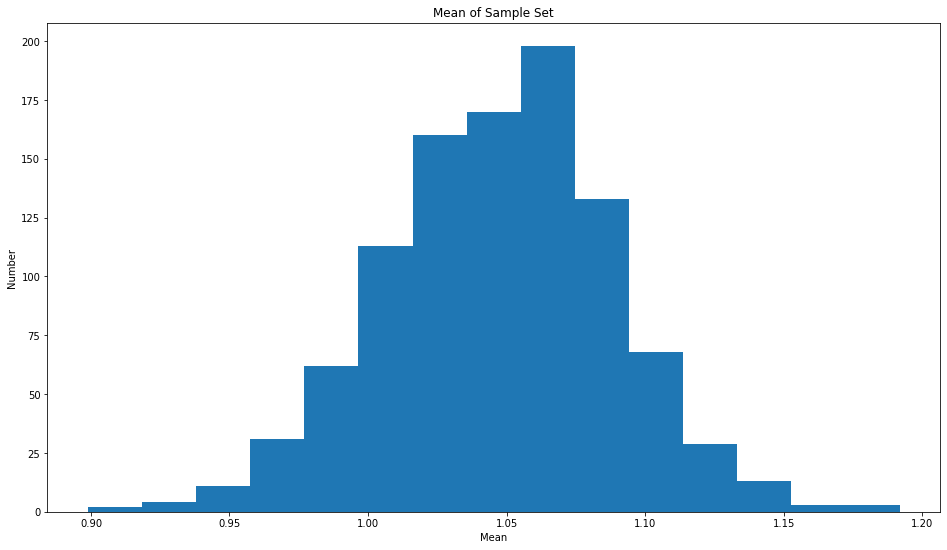

In [ ]:
plt.figure(figsize=(16,9))
plt.hist(SampleSet_mean,bins=15)
plt.xlabel('Mean')
plt.ylabel('Number')
plt.title('Mean of Sample Set')
plt.show()

In [ ]:
wine_dataset = pd.read_csv('wine.csv')
y = wine_dataset['12']
Y = np.array(y)

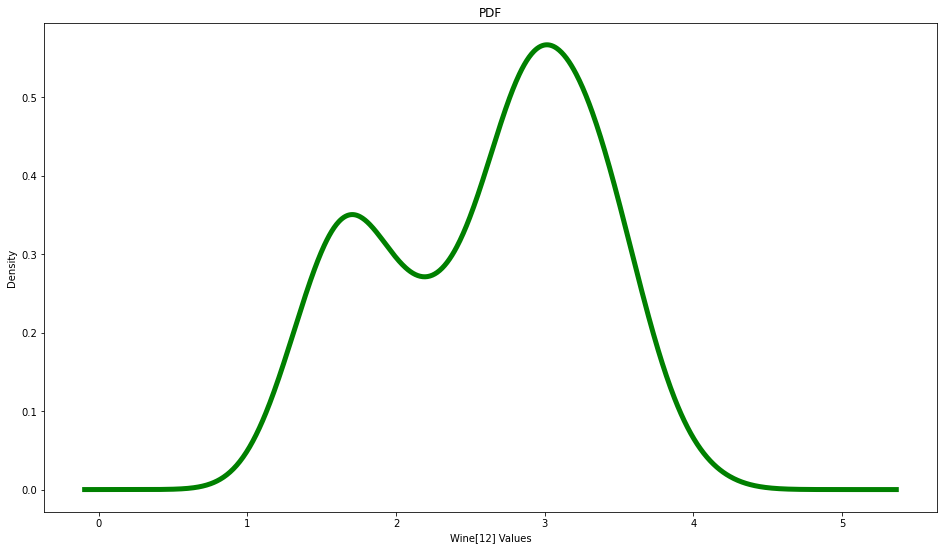

In [ ]:
plt.figure(figsize=(16,9))
y.plot.kde(linewidth=5,color='g')
plt.xlabel('Wine[12] Values')
plt.title('PDF')
plt.show()

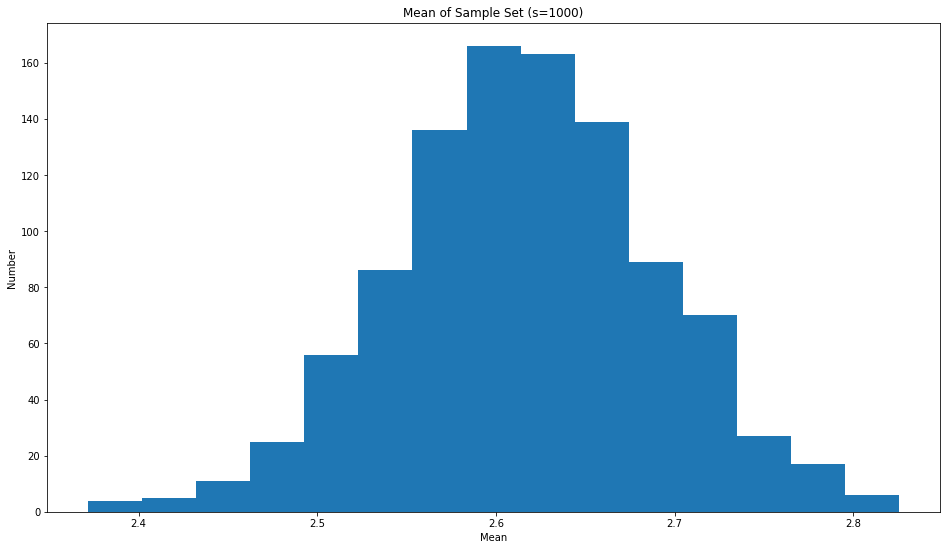

In [ ]:
s = 1000
N = [80,90,100]
SampleSet_mean = []
for i in range(s):
    # sample_indecies = index_generator(n,len(x))
    n = np.random.choice(N)
    sample_indecies = np.random.randint(0,len(Y),n)
    sample = Y[sample_indecies]
    avg = sample.mean()
    SampleSet_mean.append(avg)

plt.figure(figsize=(16,9))
plt.hist(SampleSet_mean,bins=15)
plt.xlabel('Mean')
plt.ylabel('Number')
plt.title(f'Mean of Sample Set (s={s})')
plt.show()

Illustration based on CLT (Central Limit Theorem)

In [ ]:
real_mean = np.mean(Y)
real_std = np.std(Y)
clt_mean = np.mean(SampleSet_mean)
clt_std = np.std(SampleSet_mean)

In [ ]:
print(f"Wine[12] Mean: {np.round(real_mean,3)}")
print(f"Samplesets Mean: {np.round(clt_mean,3)}")
print(f"Wine[12] Standard Deviation: {np.round(real_std,3)}")
print(f"Samplesets Standard Deviation: {np.round(clt_std,3)}")

Wine[12] Mean: 2.612
Samplesets Mean: 2.616
Wine[12] Standard Deviation: 0.708
Samplesets Standard Deviation: 0.074


# Question 2) Analytical Statistical Problems

# Question 3) Naive Bayes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import shuffle
import math

In [65]:
import random

DATA_WIDTH=28
DATA_HEIGHT=28
NUMBER_OF_TRAINING_EXAMPLES=5000
NUMBER_OF_VALIDATION_EXAMPLES=1000

ALL_TRAINING_IMAGES=[]
ALL_TRAINING_LABELS=[]
ALL_VALIDATION_IMAGES=[]
ALL_VALIDATION_LABELS=[]

'''
Convert ASC-II pixel into numerical data and vice versa
    - ' ' is converted to ..., which means it's part of the background
    - '#' is converted to ..., part of the image interior
    - '+' is converted to ..., part of the edges
    
'''

def _pixel_to_value(character):
    if(character == ' '):
        return 0
    elif(character == '#'):
        return 1
    elif(character == '+'):
        return 2  
    
def _value_to_pixel(value):
    if(value == 0):
        return ' '
    elif(value == 1):
        return '#'
    elif(value == 2):
        return '+'
'''
Function for loading data and label files
'''

def _load_data_file(filename, n, width, height):
    fin = [l[:-1] for l in open(filename).readlines()]
    fin.reverse()
    items = []
    for i in range(n):
        data = []
        for j in range(height):
            row = list(map(_pixel_to_value, list(fin.pop())))
            data.append(row)
        items.append(data)
    return items
        
def _load_label_file(filename, n):
    fin = [l[:-1] for l in open(filename).readlines()]
    labels = []
    for i in range(n):
        labels.append(int(fin[i]))
    return labels

def _load_all_data():
    global ALL_TRAINING_IMAGES
    global ALL_TRAINING_LABELS
    global ALL_VALIDATION_IMAGES
    global ALL_VALIDATION_LABELS

    ALL_TRAINING_IMAGES = _load_data_file("trainingimages",
        NUMBER_OF_TRAINING_EXAMPLES, DATA_WIDTH, DATA_HEIGHT)
    ALL_TRAINING_LABELS = _load_label_file("traininglabels",
        NUMBER_OF_TRAINING_EXAMPLES)

    ALL_VALIDATION_IMAGES = _load_data_file("validationimages",
        NUMBER_OF_VALIDATION_EXAMPLES, DATA_WIDTH, DATA_HEIGHT)
    ALL_VALIDATION_LABELS = _load_label_file("validationlabels",
        NUMBER_OF_VALIDATION_EXAMPLES)

'''
Function for printing digits
'''

def _print_digit_image(data):
    for row in range(len(data)):
        print(''.join(map(_value_to_pixel, data[row])))

In [66]:
_load_all_data()

In [67]:
example_number = random.randint(0, NUMBER_OF_TRAINING_EXAMPLES)
print("Printing digit example #" + str(example_number + 1) + " with label: " \
        + str(ALL_TRAINING_LABELS[example_number]))
_print_digit_image(ALL_TRAINING_IMAGES[example_number])

Printing digit example #3944 with label: 0
                            
                            
                            
            +# #++          
            #######+        
            +   +###++      
                 ++###      
            +++#++ ++#+     
           +######  ++#+    
          +###+ ++  +++     
         +###+       +#+    
        +###+        +##+   
      +####+         +##+   
      ### +          +##+   
     +###+           +##+   
     ###+             ##+   
     ###+             +##   
     +##+            +##+   
     +###+           +##+   
      +###++      ++###+    
      ++##############+     
        +#### #####+++      
          ++ +++            
                            
                            
                            
                            
                            


Extracting Features

In [71]:
X_train = np.array(ALL_TRAINING_IMAGES)
X_test = np.array(ALL_VALIDATION_IMAGES)
Y_train = np.array(ALL_TRAINING_LABELS)
Y_test = np.array(ALL_VALIDATION_LABELS)

In [72]:
def Index_Finder(Labels):
    indexes = []
    for i in range(10):
        temp_index = []
        for j in range(len(Labels)):
            if Labels[j] == i:
                temp_index.append(j)
        indexes.append(temp_index)
    return indexes

In [73]:
train_indexes = Index_Finder(ALL_TRAINING_LABELS)
val_indexes = Index_Finder(ALL_VALIDATION_LABELS)

In [127]:
# Feature 1: Number of # in the image
# For all dataset
def feature_1_extractor(data,N):
    temp = np.reshape(data,(N,DATA_WIDTH*DATA_HEIGHT))
    return np.sum(temp==1,axis=1)

In [128]:
# Feature 1: Number of + in the image
# For all dataset
def feature_2_extractor(data,N):
    temp = np.reshape(data,(N,DATA_WIDTH*DATA_HEIGHT))
    return np.sum(temp==2,axis=1)

In [145]:
# Feature 3: Height of image
# For one image
def feature_3_extractor(data):
    h1 = 0
    h2 = 27
    not_empty_rows = []
    empty_rows = []
    for i in range(DATA_HEIGHT):
        row = data[i]
        if np.sum(row) == 0:
            empty_rows.append(i)
        else:
            not_empty_rows.append(i)
    
    for i in range(DATA_HEIGHT):
        if i in empty_rows and (i+1) in not_empty_rows:
            h1 = i
        if i in empty_rows and (i-1) in not_empty_rows and (i+1) in empty_rows:
            h2 = i

    return h2-h1

In [146]:
# Feature 4:Width of image
# For one image
def feature_4_extractor(data):
    w1 = 0
    w2 = 27
    data_ = np.transpose(data)
    not_empty_rows = []
    empty_rows = []
    for i in range(DATA_WIDTH):
        row = data_[i]
        if np.sum(row) == 0:
            empty_rows.append(i)
        else:
            not_empty_rows.append(i)
    
    for i in range(DATA_HEIGHT):
        if i in empty_rows and (i+1) in not_empty_rows:
            w1 = i
        if i in empty_rows and (i-1) in not_empty_rows and (i+1) in empty_rows:
            w2 = i

    return w2-w1

In [147]:
def class_finder(n,indexes):
    for i in range(len(indexes)):
        if n in indexes[i]:
            return i

In [168]:
feature_1_vals = feature_1_extractor(X_train,NUMBER_OF_TRAINING_EXAMPLES)
feature_2_vals = feature_2_extractor(X_train,NUMBER_OF_TRAINING_EXAMPLES)
feature_1 = [[],[],[],[],[],[],[],[],[],[]]
feature_2 = [[],[],[],[],[],[],[],[],[],[]]
feature_3 = [[],[],[],[],[],[],[],[],[],[]]
feature_4 = [[],[],[],[],[],[],[],[],[],[]]
for i in range(NUMBER_OF_TRAINING_EXAMPLES):
    c = class_finder(i,train_indexes)
    feature_1[c].append(feature_1_vals[i])                      # Feature 1
    feature_2[c].append(feature_2_vals[i])                      # Feature 2
    feature_3[c].append(feature_3_extractor(X_train[i]))        # Feature 3
    feature_4[c].append(feature_4_extractor(X_train[i]))        # Feature 4

Training

In this part, P(x|c) is prepared.

In [172]:
def normal(x,mean,std):
    m = mean
    v = std**2
    p = (1/(np.sqrt(2*np.pi*v))) * np.exp(-1/(2*v) * (x-m)**2)
    return p

In [175]:
# [mean,std]
f1 = [[],[],[],[],[],[],[],[],[],[]]        # P(x1|c)
f2 = [[],[],[],[],[],[],[],[],[],[]]        # P(x2|c)
f3 = [[],[],[],[],[],[],[],[],[],[]]        # P(x3|c)
f4 = [[],[],[],[],[],[],[],[],[],[]]        # P(x4|c)
for i in range(10):
    f1[i].append(np.mean(feature_1[i]))
    f1[i].append(np.std(feature_1[i]))
    f2[i].append(np.mean(feature_2[i]))
    f2[i].append(np.std(feature_2[i]))
    f3[i].append(np.mean(feature_3[i]))
    f3[i].append(np.std(feature_3[i]))
    f4[i].append(np.mean(feature_4[i]))
    f4[i].append(np.std(feature_4[i]))

In [176]:
def naive_bayes_model(X_test,f1,f2,f3,f4):
    x1 = feature_1_extractor(X_test,1)
    x2 = feature_2_extractor(X_test,1)
    x3 = feature_3_extractor(X_test)
    x4 = feature_4_extractor(X_test)
    P = []
    for i in range(10):
        p1 = normal(x1,f1[i][0],f1[i][1])
        p2 = normal(x2,f2[i][0],f2[i][1])
        p3 = normal(x3,f3[i][0],f3[i][1])
        p4 = normal(x4,f4[i][0],f4[i][1])
        p = p1 * p2 * p3 * p4
        P.append(p)
    predicted_label = np.argmax(np.array(P))
    return predicted_label

Validation

In this part the designed model is evaluated.

In [186]:
def accuracy(Y_pred,Y_test):
    n = len(Y_test)
    correct_predictions = np.sum(Y_pred==Y_test)
    acc = correct_predictions/n
    return acc

In [187]:
Y_pred = []
for i in range(NUMBER_OF_VALIDATION_EXAMPLES):
    y_hat = naive_bayes_model(X_test[i],f1,f2,f3,f4)
    Y_pred.append(y_hat)
Y_pred = np.array(Y_pred)

In [191]:
acc = accuracy(Y_pred,Y_test) * 100
print("Naive Bayes Model Accuracy:")
print(f"{np.round(acc,2)}%")

Naive Bayes Model Accuracy:
27.4%
